# Risk-Hazard Convolution Module

This script takes a fragility function as input and does the convolution with a hazard curve in order to estimate the annual probability of collapse. 


## Load hazard curve

In order to use this methodology, it is necessary to provide a hazard curve, defined according to the format established on the [RMTK manual](../../../../../rmtk-docs.pdf). Please provide the location of the file containing this input using the parameter capacity_curves_file.

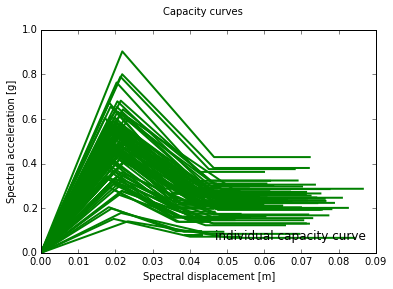

In [30]:
from rmtk.vulnerability.common import utils
%matplotlib inline 

hazard_curve_file = '../../../../../../Google Drive 2/Otros GEM/RMTK/Convolution_module/Hazard_PGA.csv'
hazard_curve = utils.read_hazard(hazard_curve_file)
utils.plot_hazard_curve(hazard_curve)

## Load fragility function

The fragility function representing the risk of the building class being analysed should be provided here. This function should follow the format established in the [RMTK manual](../../../../../rmtk-docs.pdf). Please provide the location of the file containing this input using the parameter fragility_function_file.

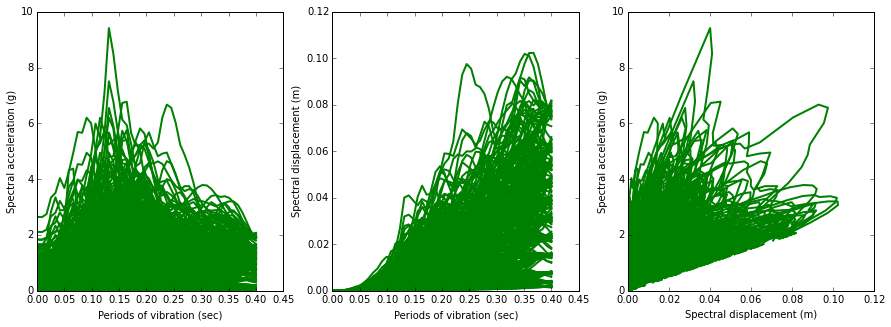

In [44]:
fragility_function_file = '../../../../../../Google Drive 2/Otros GEM/RMTK/Convolution_module/MUR_H1.csv'
fragility_model = utils.read_frag_model(fragility_function_file)
save = False
utils.plot_fragility_model(fragility_function_file,0.01,2,save)

## Calculate annual probability of damage


In order to obtain the fragility model, it is necessary to input the return period for which the hazard curve was derived, as well as the damage state of interest (slight, collapse, etc.), as described in the [RMTK manual](../../../../../rmtk-docs.pdf). 

def calculate_convolution(hazard_curve,fragility_model,return_period,damage_state)

1%
[0.021815, 0.034322500000000006, 0.046830000000000004, 0.071845]
2%
[0.020418, 0.0304645, 0.040511, 0.060604]
3%
[0.022193, 0.035367499999999996, 0.048542, 0.074891]
4%
[0.021648, 0.033862, 0.046076, 0.070504]
5%
[0.021948, 0.03469175, 0.0474355, 0.072923]
6%
[0.018117, 0.02410725, 0.0300975, 0.042078]
7%
[0.01898, 0.02649125, 0.0340025, 0.049025]
8%
[0.020176, 0.02979575, 0.0394155, 0.058655]
9%
[0.019343, 0.027493999999999998, 0.035644999999999996, 0.051947]
10%
[0.02104, 0.0321815, 0.043323, 0.065606]
11%
[0.019523, 0.0279905, 0.036458000000000004, 0.053393]
12%
[0.020571, 0.030885999999999997, 0.041201, 0.061831]
13%
[0.020137, 0.02968775, 0.0392385, 0.05834]
14%
[0.022588, 0.036458500000000005, 0.050329, 0.07807]
15%
[0.020935, 0.03189225, 0.0428495, 0.064764]
16%
[0.021835, 0.03437900000000001, 0.046923000000000006, 0.072011]
17%
[0.018722, 0.025779499999999997, 0.032837, 0.046952]
18%
[0.019444, 0.02777325, 0.0361025, 0.052761]
19%
[0.021865, 0.03446175, 0.047058499999999996,

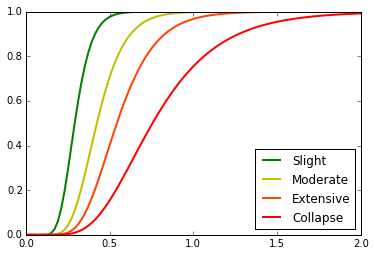

In [45]:
from rmtk.vulnerability.Convolution_module import Convolution

return_period = 50
damage_state = 'Collapse'
save = True

APD = Convolution.calculate_convolution(hazard_curve,fragility_model,return_period,damage_state)


In [208]:
# -*- coding: utf-8 -*-
import os
import numpy
import math
import csv
import matplotlib.pyplot as plt
from rmtk.vulnerability.common import utils
from scipy.stats import lognorm

def read_hazard(input_file):    
#This function reads a hazard curve and stores it in a dictionary

    file = open(input_file)
    data = csv.reader(file)
    IMLs = []
    prob_exceedance = []
    IM_type = []
    for line in data:
        if line[0] == 'PGA':
            IM_type.append(line[0])
            for value in line[1:]:
                if isNumber(value):    
                    IMLs.append(float(value))
        if line[0] == 'Sa':
            IM_type.append(line[0])
            for value in line[1:]:
                if isNumber(value):
                    IMLs.append(float(value))
        if line[0] == 'PoE':
            for value in line[1:]:
                if isNumber(value):
                    prob_exceedance.append(float(value))
                
    #Store all the data in the dictionary
    hazard_curve = {'IMLs':None,'PoE':None,'IM_Type':None}
    hazard_curve['IMLs'] = IMLs
    hazard_curve['PoE'] = prob_exceedance
    hazard_curve['IM_Type'] = IM_type
      
    return hazard_curve

def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def plot_hazard_curve(hazard_curve):
#This function plots the hazard curve

    IMLs = hazard_curve['IMLs']
    PoE = hazard_curve['PoE']
    plt.plot(IMLs,PoE,color='g',linewidth=2)
    plt.xlabel(hazard_curve['IM_Type'][0] + ' [g]',fontsize = 10)
    plt.ylabel('Probability of Exceedance',fontsize = 10)

{'IM_Type': ['PGA'], 'PoE': [0.8417, 0.4357, 0.1229, 0.0459, 0.0205, 0.0103, 0.0056, 0.0032, 0.0019, 0.0012, 0.0008, 0.0003], 'IMLs': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2]}


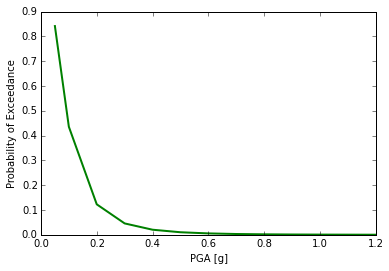

In [209]:
input_file = 'Hazard_PGA.csv'
%matplotlib inline 
hazard_curve = read_hazard(input_file)
print(hazard_curve)
plot_hazard_curve(hazard_curve)

In [210]:
# -*- coding: utf-8 -*-
import os
import numpy
import math
import csv
import matplotlib.pyplot as plt
from rmtk.vulnerability.common import utils
from scipy.stats import lognorm

def read_frag_model(input_file):    
#This function reads a fragility model and stores it in a dictionary

    damage_states = []
    model_type = []
    cent_value = []
    dispersion = []
    log_mean = []
    log_stdev = []
        
    file = open(input_file)
    data = file.readlines()
    line = data[0]
    line = line.strip().split(',')
    model_type = line[1]+' - '+line[2]
    
    file = open(input_file)
    data = csv.reader(file)
    data = [row for row in data]
    for iline in range(len(data)-1):
        line = data[iline+1]
        damage_states.append(line[0])
        cent_value.append(float(line[1]))
        dispersion.append(float(line[2]))
    
    if model_type == ' median -  dispersion':
        for ids in range(len(cent_value)):
            mean = math.log(cent_value[ids])
            stdev = dispersion[ids]
            log_mean.append(mean)
            log_stdev.append(stdev)
    elif model_type == ' mean of x -  cov of x':
        for ids in range(len(cent_value)):
            mu = cent.value[ids]
            cov = dispersion[ids]
            median = (mu**2)/math.sqrt(mu**2+cov**2)
            mean = math.log(median)
            stdev = math.sqrt(math.log(1+(cov**2)/mu**2))
            log_mean.append(mean)
            log_stdev.append(stdev)
    elif model_type == 'mean of ln(x) -  st. dev. of ln(x)':
        for ids in range(len(cent_value)):
            mean = cent_value[ids]
            stdev = line[ids]
            log_mean.append(mean)
            log_stdev.append(stdev)
                
    #Store all the data in the dictionary
    fragility_model =  {'Damage_states':None,'log_mean':None,'log_stdev':None}
    fragility_model['Damage_states'] = damage_states
    fragility_model['log_mean'] = log_mean
    fragility_model['log_stdev'] = log_stdev
       
    return fragility_model
            

In [211]:
fragility_function_file = 'MUR_H1.csv'
fragility_model = read_frag_model(fragility_function_file)
save = False
print(fragility_model)

{'Damage_states': ['Slight', 'Moderate', 'Extensive', 'Collapse'], 'log_stdev': [0.393208, 0.39895, 0.401788, 0.427387], 'log_mean': [-1.5282312670143712, -0.994517173291625, -0.7509097768813768, -0.47061501610459816]}


In [227]:
print(hazard_curve['IMLs'])
print(len(hazard_curve['IMLs']))

[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2]
12


In [345]:
# -*- coding: utf-8 -*-
import os
import numpy
import math
import csv
import matplotlib.pyplot as plt
from rmtk.vulnerability.common import utils
from scipy.stats import lognorm

def calculate_convolution(hazard_curve,fragility_model,return_period,damage_state):
#This function calculates the annual probability of collapse given a hazard 
#curve and a fragility model

    rate_exceed = []
    segment_limit = []
    segment_width = []
    imls = []
    prob_exceed = []
    frag_curve = []
    damage_rate_dist = []
   
    for iIML in range(len(hazard_curve['IMLs'])):
        #1. Calculate the annual rate of exceedance
        imls.append(hazard_curve['IMLs'][iIML])
        prob_exceed.append(hazard_curve['PoE'][iIML])
        rate_exceed.append(-math.log(1-prob_exceed[iIML])/return_period)  
            
    #2. Divide the curve into segments and derive the rate of occurrence 
    #   of the associated central IML value
    for iIML in range(len(imls)-1):
        segment_limit.append((imls[iIML]+imls[iIML+1])/2)
        
    segment_width.append(segment_limit[0])
    for iDelta in range(len(imls)-2):
        k = iDelta + 1
        segment_width.append(segment_limit[k]-segment_limit[(k-1)])
    segment_width.append(imls[-1]-segment_limit[-1])
    
    #3. Read fragility curve of interest and estimate the probability of 
    #   reaching the DS of interest, given the values of IML
    ds = fragility_model['Damage_states'].index(damage_state)
    mean = fragility_model['log_mean'][ds]
    stdev = fragility_model['log_stdev'][ds]
    for iIML in range(len(imls)):
        frag_curve.append(lognorm.cdf(imls[iIML], stdev, loc=0, scale=math.exp(mean)))
    
    #4. Calculate the damage rate distribution for the given IML
    for iIML in range(len(imls)):
        damage_rate_dist.append(rate_exceed[iIML]*frag_curve[iIML]*segment_width[iIML])
    
    #5. Calculate the annual damage rate (ADR) and annual probability of damage (APD)
    ADR = sum(damage_rate_dist)
    APD = (math.exp(ADR*1)-1)/math.exp(ADR*1)
      
    return APD

    print(ADR)

    #print(rate_exceed)
    #print(frag_curve)
    #print(damage_rate_dist)
   
    
    #print(rate_exceed)
        

In [346]:
return_period = 50
damage_state = 'Collapse'

APD = calculate_convolution(hazard_curve,fragility_model,return_period,damage_state)
print(APD)

3.38339719991e-05
